In [ ]:
# Import all the tools we needs 

#regular EDA(exploratory data analysis) and plotting  libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# we want our plot appears inside the notebooks
%matplotlib inline 

#model from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


In [ ]:
df=pd.read_csv("heart-disease-Copy1.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sklearn.metrics as metrics

In [ ]:
df.shape

(303, 14)

In [ ]:
df["target"]. value_counts()

1    165
0    138
Name: target, dtype: int64

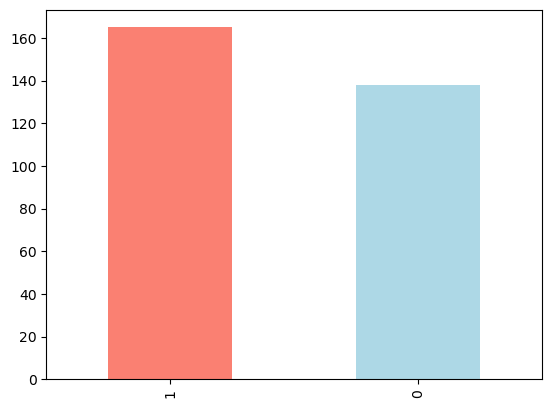

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease fequency according to Sex

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


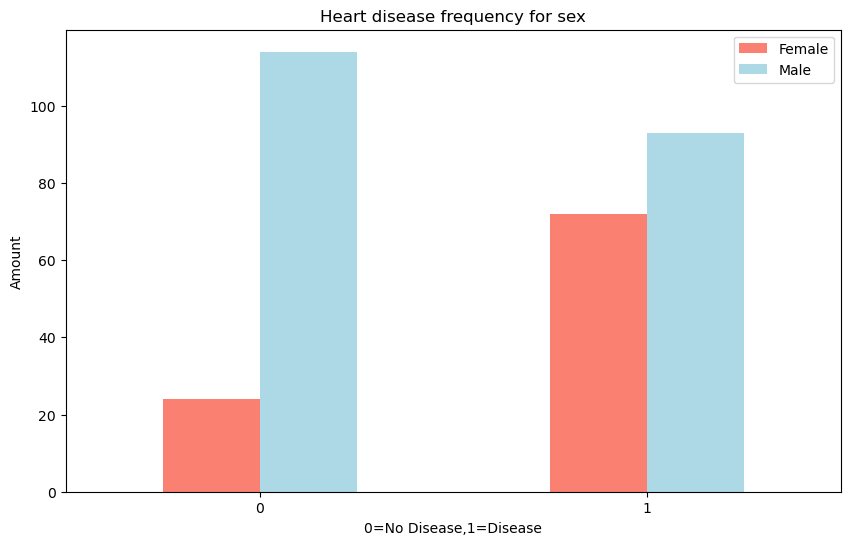

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
figsize=(10,6),
color=["salmon","lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

 ## Age vs Max Heart rate of Heart Disease 

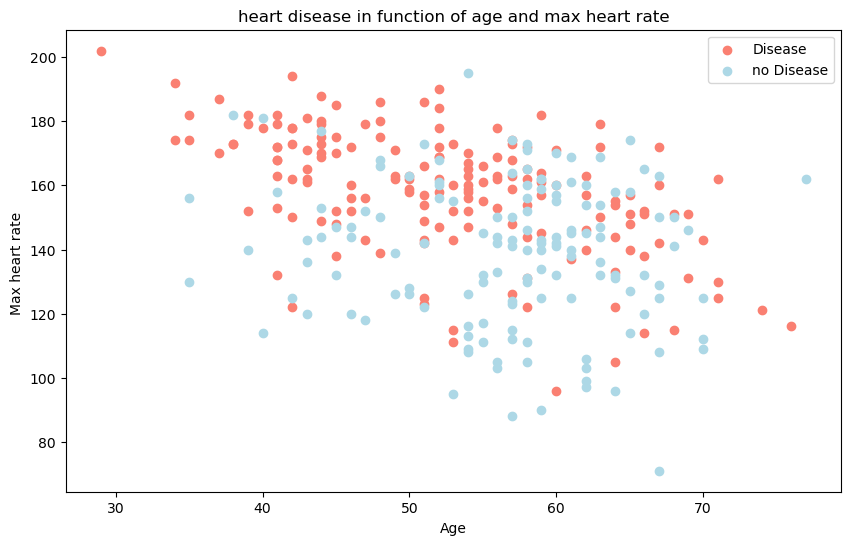

In [ ]:
# creating a another figure 
plt.figure(figsize=(10,6))

#Scatter with postive Example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#Scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")
plt.title("heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate ")
plt.legend(["Disease","no Disease"]);

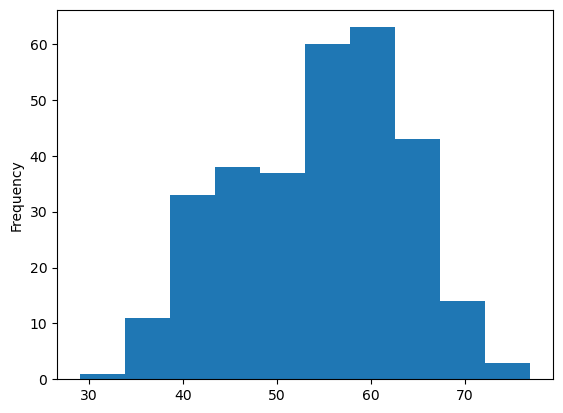

In [ ]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
cp chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of 


In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


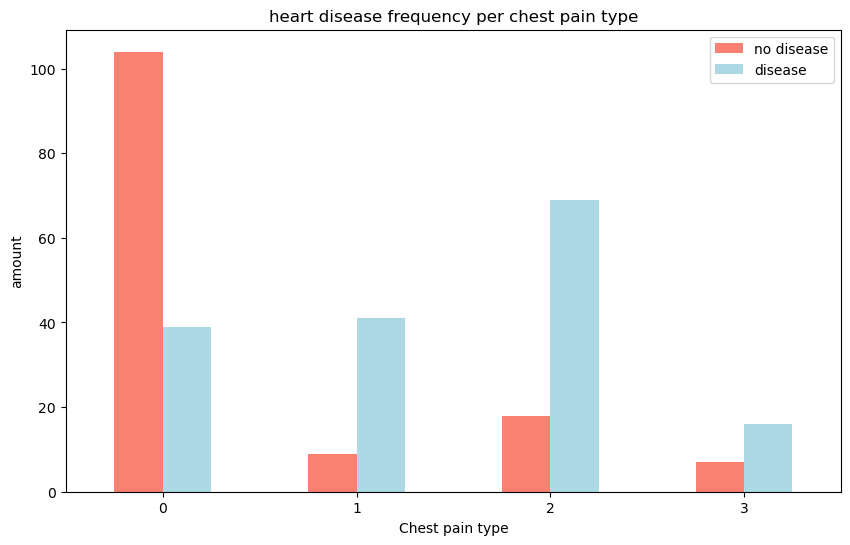

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [1]:
# lets make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);

NameError: name 'df' is not defined

## now preparing data for machine learning 

In [18]:
# split the data into x and y
x=df.drop("target",axis=1)
y=df["target"]


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
#split the data into train and test data 
np.random.seed(42)
#split into train  and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


## we are going to try 3 different machine learning model:
* logistics Regression
* K-nearest neighbour classifier 
* random forest classifier 


In [22]:
# put the model in a dictionary 
models ={"Logistics Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "RandomForest":RandomForestClassifier() }
# create a function to fit and score model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    # set the random seed 
    np.random.seed(42)
    # make a dictionary to keep model scores 
    model_scores ={}
    #loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evalute the model and append its score to the model_score 
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                          x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

D:\SAvideo\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

<Axes: >

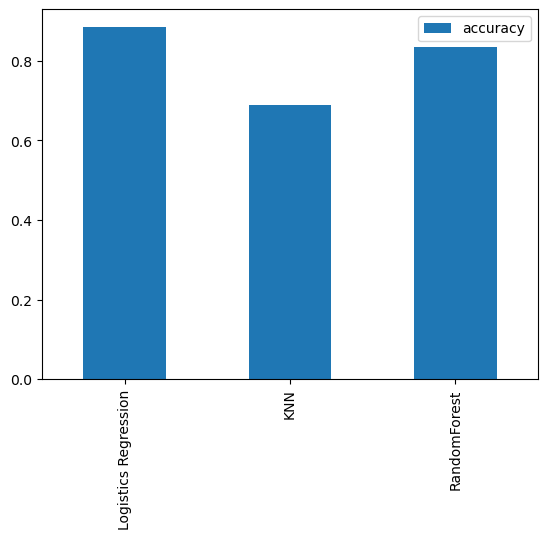

In [24]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first
predictions aren't always what we should based our next steps off.
What should do?
Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 sc Recall if one school classification report rosy curve area under the
* Classification report
curve.

## Hyperparameter tuning

In [44]:
# lets tune KNN
Train_scores=[]
Test_scores=[]

#create a list of different valve for n neighbors
neighbors=range(1,21)
# setup KNN instance 
Knn=KNeighborsClassifier()

# loop through different n-neighbors  
for i in neighbors:
    Knn.set_params(n_neighbors=i)

    # fit the algorithm
    Knn.fit(x_train,y_train)
    # update the training Scorelist
    Train_scores.append(Knn.score(x_train,y_train))
    #update the test score list:
    Test_scores.append(Knn.score(x_test,y_test))     

In [46]:
Train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [80]:
Test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN Score on the test data :75.409836%


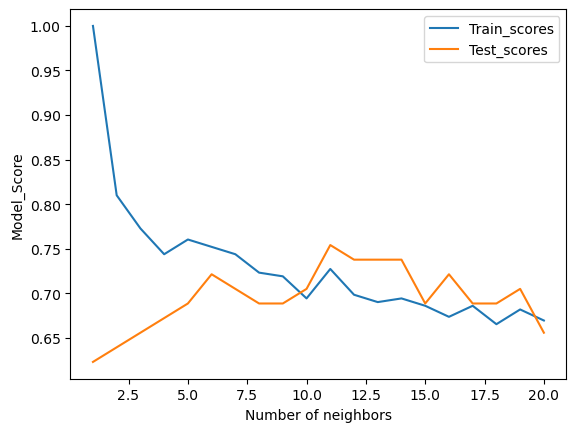

In [55]:
#plotting  teh graph 
plt.plot(neighbors,Train_scores,label="Train_scores")
plt.plot(neighbors,Test_scores,label="Test_scores")
plt.xlabel("Number of neighbors",)
plt.ylabel("Model_Score")
plt.legend()
print(f"maximum KNN Score on the test data :{ max(Test_scores)*100:2f}%")

# Tuning a logistic regression  of Machine learning 

In [86]:
# Hyperparameter tuning with Randomizedsearchcv


In [105]:
#Create a hyperparametr  grid for logisticsRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
# Create a Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_sample_split":np.arange(2,20,2),
         "min_samples_lead":np.arange(1,20,2)}

In [106]:
np.random.seed(42)
#Setup random hyperparameter search for logisticsRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random Hyperparameter search model for logisticsRegression
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [107]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [108]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [126]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
# Create a Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

# now'we are tuned logisticsRegression() lets do the same for randomForestclassifier()
#setup random seed
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [128]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [129]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [130]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with Gridsearch CV

since our logistics Regression model provide the best score so far will try and improve theen again using Grid search CV

In [137]:
#Diffeernet hyperparameter for our Logistics Regression model 
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
# setup grid hyperparameter search for logisticsRegression 
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
# fit grid hyperparameter searchmodel
gs_log_reg.fit(x_train,y_train)

# check the best hyperparameter
gs_log_reg.best_params_

#evaluate the grid search logistics regression model 
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

Evaluting our tuned machine learning classifier, beyond
accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.
To make comparisons and evaluate our trained model, first we need to make predictions.

In [138]:
# make prediction with tuned model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [140]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

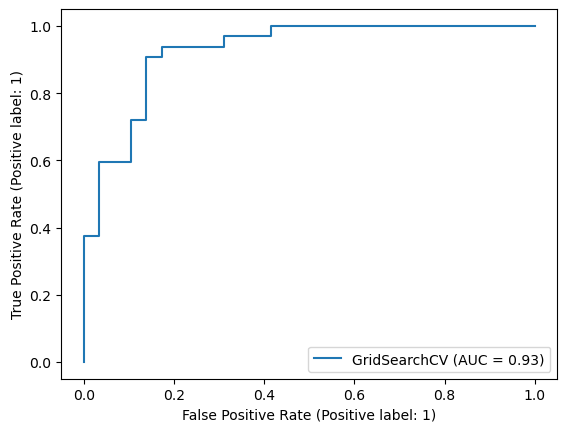

In [151]:
#import Roc curve and AUC curve 
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)


In [152]:
#confusion matirx
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


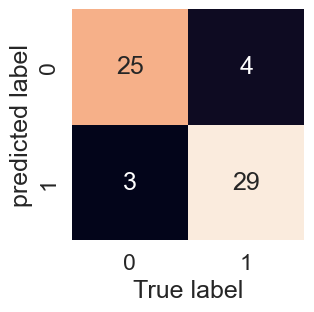

In [161]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plota nice looking confusion matrix using seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report
as well as cross-validated precision, recall and f1-score.

In [163]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-
validation and to do so we'll be using cross_val_score( ) .

In [164]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [165]:
clf=LogisticRegression(C= 0.20433597178569418,
                      solver="liblinear")


In [169]:
#cross validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [171]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [176]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [177]:
cv_pres=np.mean(cv_precision)
cv_pres

0.8207936507936507

In [178]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [180]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [181]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [183]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classfication metrics'}>

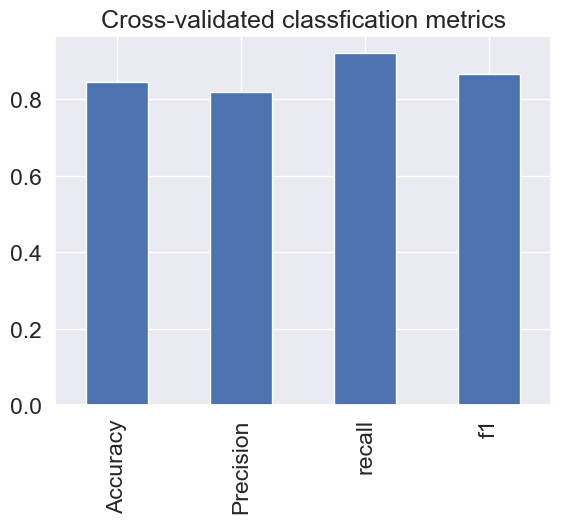

In [188]:
# Visualize cross -validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_pres,
                        "recall":cv_recall,
                        "f1":cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classfication metrics",
                     legend=False)

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the
model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature
importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Logistic Regression model...

In [194]:
clf=LogisticRegression(C= 0.20433597178569418,
                      solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [195]:
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [196]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<Axes: title={'center': 'feature importance'}>

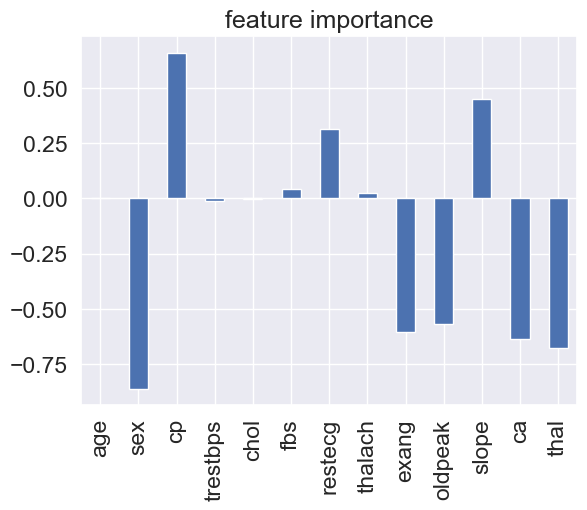

In [197]:
#visualize feature  importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it
  and share it with others?